In [1]:
import pandas as pd
df = pd.read_csv('zdrojova_data_sreality.csv')
df.head()

,Unnamed: 0,Cena,Kompozice bytu,Rozměry bytu,Lokace
0,0,19 000 Kč/měsíc,73,3+1,"Slezská, Zlín"
1,1,8 300 Kč/měsíc,26,1+kk,"Tečovská, Zlín - Malenovice"
2,2,Cena na vyžádání,31,1+kk,"J. A. Bati, Zlín"
3,3,18 700 Kč/měsíc,65,2+kk,"Lorencova, Zlín"
4,4,12 000 Kč/měsíc,56,2+1,"Dlouhá, Zlín"


In [2]:
df['Cena'] = df['Cena'].str.replace('Kč/měsíc','').str.replace('\u00A0', '')
df['Cena'] = df['Cena'].str.replace('Cena na vyžádání','0')
df['Cena'] = df['Cena'].astype(int)
df['Kompozice bytu'] = df['Kompozice bytu'].str.replace('\u00A0', '')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      153 non-null    int64 
 1   Cena            153 non-null    int32 
 2   Kompozice bytu  153 non-null    object
 3   Rozměry bytu    153 non-null    object
 4   Lokace          153 non-null    object
dtypes: int32(1), int64(1), object(3)
memory usage: 5.5+ KB


In [3]:
df.head(10)

,Unnamed: 0,Cena,Kompozice bytu,Rozměry bytu,Lokace
0,0,19000,73,3+1,"Slezská, Zlín"
1,1,8300,26,1+kk,"Tečovská, Zlín - Malenovice"
2,2,0,31,1+kk,"J. A. Bati, Zlín"
3,3,18700,65,2+kk,"Lorencova, Zlín"
4,4,12000,56,2+1,"Dlouhá, Zlín"
5,5,9000,25,1+1,"Vysoká, Zlín"
6,6,14900,21,1+kk,"Zahradní, Zlín - Malenovice"
7,7,16000,68,3+1,"Tyršova, Zlín - Malenovice"
8,8,25000,96,2+kk,"Lešetín I, Zlín"
9,9,0,41,1+kk,"J. A. Bati, Zlín"


In [4]:
# Vymazávám řádky s nulovou hodnotou ve sloupci cena
df = df[df['Cena'] != 0].reset_index(drop=True)
df['Cena'].sort_values()

111     3708
125     4000
118     4200
53      4300
79      6500
       ...  
116    25000
7      25000
115    25000
59     29000
146    39900
Name: Cena, Length: 149, dtype: int32

#### Jaká je průměrná cena bytů?

In [5]:
prum_cena_bytu = df['Cena'].mean().round(2)
print(f'Průměrná cena všech nabízených bytů je: {prum_cena_bytu} Kč/měsíc ')


Průměrná cena všech nabízených bytů je: 14216.7 Kč/měsíc 


#### Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.

In [6]:
prumerne_ceny = df.groupby('Rozměry bytu')['Cena'].mean().reset_index(name='Průměrná cena').round(2)
prumerne_ceny


,Rozměry bytu,Průměrná cena
0,1+1,10228.57
1,1+kk,11200.00
2,2+1,13346.55
3,2+kk,17051.90
4,3+1,16450.00
5,3+kk,19125.00
6,4+1,20000.00
7,4+kk,39900.00
8,atypický,9750.00
9,bytu,9000.00


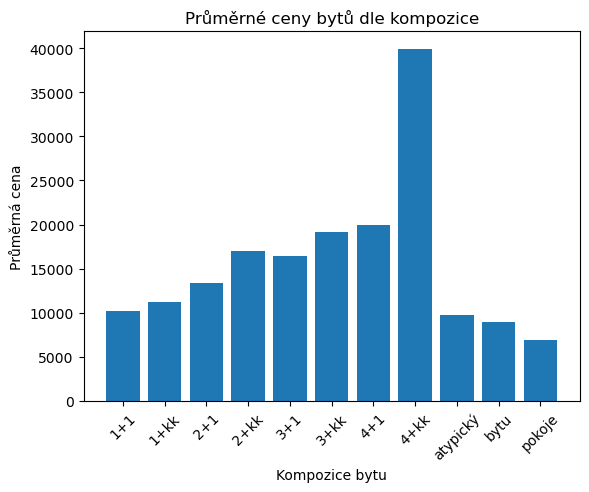

In [7]:

from matplotlib import pyplot as plt

plt.bar(prumerne_ceny['Rozměry bytu'], prumerne_ceny['Průměrná cena'])
plt.title('Průměrné ceny bytů dle kompozice')
plt.xlabel('Kompozice bytu')
plt.ylabel('Průměrná cena')
plt.xticks(rotation=45)

plt.show()


In [8]:
# Přetypování sloupce Kompozice bytu na číslo

df['Kompozice bytu'] = pd.to_numeric(df['Kompozice bytu'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      149 non-null    int64  
 1   Cena            149 non-null    int32  
 2   Kompozice bytu  148 non-null    float64
 3   Rozměry bytu    149 non-null    object 
 4   Lokace          149 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 5.4+ KB


In [9]:
df = df.rename(columns={'Kompozice bytu': 'Výměra'})
df = df.rename(columns={'Rozměry bytu': 'Kompozice bytu'})
df.head()


,Unnamed: 0,Cena,Výměra,Kompozice bytu,Lokace
0,0,19000,73.0,3+1,"Slezská, Zlín"
1,1,8300,26.0,1+kk,"Tečovská, Zlín - Malenovice"
2,3,18700,65.0,2+kk,"Lorencova, Zlín"
3,4,12000,56.0,2+1,"Dlouhá, Zlín"
4,5,9000,25.0,1+1,"Vysoká, Zlín"


#### Jaká je průměrná velikost bytu pro každou kompozici?

In [10]:
prumerna_velikost = df.groupby('Kompozice bytu')['Výměra'].mean().reset_index(name='Průměrná velikost').round(2)
prumerna_velikost

,Kompozice bytu,Průměrná velikost
0,1+1,35.07
1,1+kk,29.12
2,2+1,56.55
3,2+kk,61.31
4,3+1,78.59
5,3+kk,82.88
6,4+1,81.00
7,4+kk,100.00
8,atypický,27.00
9,bytu,NaN


#### Existuje ulice, kde je vyšší koncentrace dražších bytů?

In [11]:
# Výběr nejdražších bytů - zjištění kvartilu 75%

df.describe()



,Unnamed: 0,Cena,Výměra
count,149.000000,149.000000,148.000000
mean,76.832215,14216.697987,54.452703
std,43.585797,4942.948649,24.008030
min,0.000000,3708.000000,16.000000
25%,40.000000,11500.000000,36.000000
50%,77.000000,13500.000000,53.000000
75%,114.000000,17000.000000,66.250000
max,152.000000,39900.000000,120.000000


In [12]:
# Budu hledat výskyt bytů dražších než 18.900,-Kč

nejdrazsi_byty = df.loc[df['Cena']>18900]
df = df.sort_values(by='Cena', ascending=False)
seskupene_lokace = nejdrazsi_byty.groupby('Lokace')['Cena'].count()
seskupene_lokace

Lokace
Bartošova, Zlín                     1
Chelčického, Zlín - Malenovice      1
Dlouhá, Zlín                        1
Lešetín I, Zlín                     1
Luhačovice                          6
Na Honech I, Zlín                   1
Na Honech II, Zlín                  1
Nádražní, Luhačovice                1
Přístav, Zlín - Příluky             1
Slezská, Zlín                       2
Slunečná, Zlín                      1
Smetanova, Zlín                     2
Zabrání, Zlín - Malenovice          1
třída Svobody, Zlín - Malenovice    1
třída Tomáše Bati, Zlín             1
Name: Cena, dtype: int64

#### Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?

In [13]:
lokace_bytu = df.groupby('Kompozice bytu')['Lokace'].count().sort_values(ascending=False)
lokace_bytu

Kompozice bytu
2+kk        42
2+1         29
1+kk        24
3+1         17
1+1         14
pokoje       9
3+kk         8
4+1          2
atypický     2
4+kk         1
bytu         1
Name: Lokace, dtype: int64

#### Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?

In [14]:
vice_nez_20000 = df.loc[df['Cena']>20000]
vice_nez_20000

,Unnamed: 0,Cena,Výměra,Kompozice bytu,Lokace
146,150,39900,100.0,4+kk,Luhačovice
59,62,29000,95.0,3+kk,"třída Tomáše Bati, Zlín"
115,118,25000,75.0,3+kk,"Na Honech I, Zlín"
7,8,25000,96.0,2+kk,"Lešetín I, Zlín"
116,119,25000,111.0,2+kk,"Smetanova, Zlín"
139,142,23000,120.0,2+kk,"Nádražní, Luhačovice"
60,63,22000,85.0,2+kk,Luhačovice
39,42,22000,85.0,2+kk,Luhačovice
102,105,22000,85.0,2+kk,Luhačovice
19,21,22000,85.0,2+kk,Luhačovice


#### Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?

In [15]:
df.head()


,Unnamed: 0,Cena,Výměra,Kompozice bytu,Lokace
146,150,39900,100.0,4+kk,Luhačovice
59,62,29000,95.0,3+kk,"třída Tomáše Bati, Zlín"
115,118,25000,75.0,3+kk,"Na Honech I, Zlín"
7,8,25000,96.0,2+kk,"Lešetín I, Zlín"
116,119,25000,111.0,2+kk,"Smetanova, Zlín"


In [20]:
# Předpokládám, že je myšlena min a max CENA pro každou kompozici bytu

rozdily_cen = df.groupby('Kompozice bytu')['Cena'].agg(['min', 'max'])
rozdily_cen['rozdil'] = rozdily_cen['max'] - rozdily_cen['min']
rozdily_cen = rozdily_cen.sort_values(by='rozdil', ascending=False)
rozdily_cen


,min,max,rozdil
Kompozice bytu,,,
2+kk,9000,25000,16000
3+kk,13000,29000,16000
1+1,4200,13500,9300
1+kk,6500,14900,8400
2+1,9000,16500,7500
3+1,11900,19000,7100
pokoje,3708,10500,6792
atypický,7500,12000,4500
4+1,19000,21000,2000
